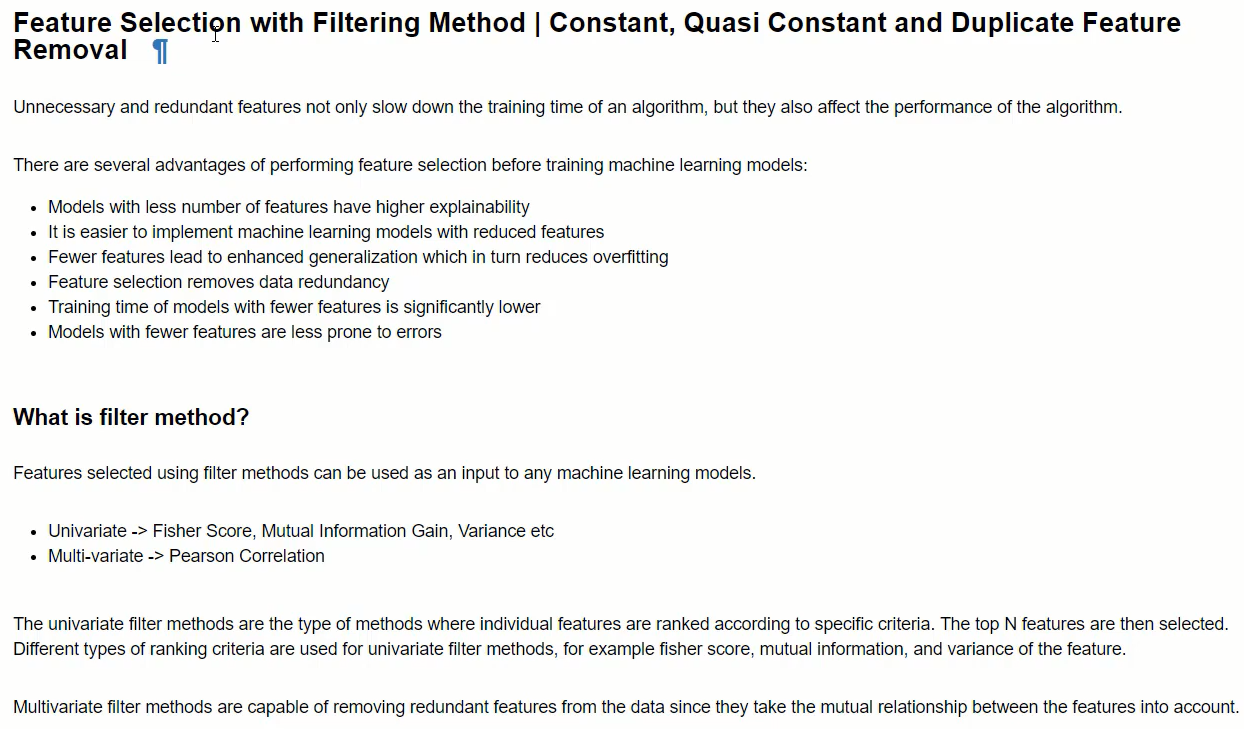

## Filtering Methods

### 1. Univarient -> Fisher Score, Mutual VInformation Gain, Variance etc
### 2. Multivarient  -> Pearson Correlation

### Univarient Filtering Methods
1. Constants Removal
2. Quasi Constant Removal
3. Duplicate feature removal

### Advantages:
1. Individual features are ranked according to specific criteria
2. Top features get selected via ranking method
3. faster method
4. Removes constant, Quasi constant and duplicate features

### Disadvantages:
1. They may select redundant features bacause relationship between features not taken into account.
2. They do not remove redundant and correlated features

### 1. Constant features removal

In [106]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold

In [108]:
data = pd.read_csv('C:/Users/dell/Downloads/Data-Files-for-Feature-Selection-master/Data-Files-for-Feature-Selection-master/santander-train.csv', nrows=20000)

In [109]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 371 entries, ID to TARGET
dtypes: float64(98), int64(273)
memory usage: 56.6 MB


In [111]:
data.shape

(20000, 371)

In [112]:
X = data.drop(['TARGET'], axis = 1)
y = data['TARGET']

X.shape, y.shape

((20000, 370), (20000,))

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Constant Feature removal

In [114]:
constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [115]:
constant_filter.get_support().sum() # Non constant features after removing constant features

291

In [116]:
constant_list = [not temp for temp in constant_filter.get_support()]
X.columns[constant_list] # List of constant features removed from dataset

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0',
       'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0',
       'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27',
       'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var34', 'saldo_var41', 'saldo_var46',
       'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var33_1y3',
       'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_var7_emit_ult1',
       'imp

In [117]:
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_filter = constant_filter.transform(X_train)
X_test_filter = constant_filter.transform(X_test)

In [118]:
X_train_filter.shape, X_test_filter.shape, X_train.shape

((16000, 291), (4000, 291), (16000, 370))

### 2. Quasi-Constant feature removal
- Same values almost constant for large subset of the dataset

In [119]:
quasi_constant_filter = VarianceThreshold(threshold = 0.01)
# We are using updated dataset after removing constant features
quasi_constant_filter.fit(X_train_filter) 

VarianceThreshold(threshold=0.01)

In [120]:
quasi_constant_filter.get_support().sum() # We removed 291-245 = 45 features

245

In [121]:
## Apply transform on training dataset to avoid overfitting and to remove constant features
X_train_quasi_filter = quasi_constant_filter.transform(X_train_filter)
X_test_quasi_filter = quasi_constant_filter.transform(X_test_filter)

In [122]:
X_train_quasi_filter.shape, X_test_quasi_filter.shape, X_train_filter.shape

((16000, 245), (4000, 245), (16000, 291))

### 3. Duplicate features removal
- Features having similar data
- We have to transpose data -> remove similar rows -> reverse transpose

In [123]:
# Transpose(T) the latest dataset -> convert to nparray
X_train_T = X_train_quasi_filter.T
X_test_T = X_test_quasi_filter.T

In [124]:
type(X_train_T)

numpy.ndarray

In [125]:
# COnvert nparray to pandas dataframe
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [126]:
X_train_T.shape, X_test_T.shape # rows changed to columns and vice versa

((245, 16000), (245, 4000))

In [127]:
# Check no of duplicate features
X_train_T.duplicated().sum()

18

In [128]:
duplicated_features = X_train_T.duplicated() # get duplicated features
features_to_keep = [not index for index in duplicated_features] # get not duplicated features

In [129]:
# Reverse transpose the features data
X_train_unique = X_train_T[features_to_keep].T
X_test_unique = X_test_T[features_to_keep].T

In [130]:
X_train_unique.shape, X_test_unique.shape, X_train_quasi_filter.shape, X_test_quasi_filter.shape

((16000, 227), (4000, 227), (16000, 245), (4000, 245))

In [131]:
X_train_unique.shape, X_train.shape

((16000, 227), (16000, 370))

## Build ML model and compare the performance of the selected features

### Random forest classifier

In [132]:
def run_random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set")
    print(accuracy_score(y_test, y_pred))

In [133]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_unique, X_test_unique, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

  

Accuracy on test set
0.95875
Time: 3.630289077758789


In [134]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 3.5903913974761963


### As per observation accurancy have not improved but time taken to execute has improved

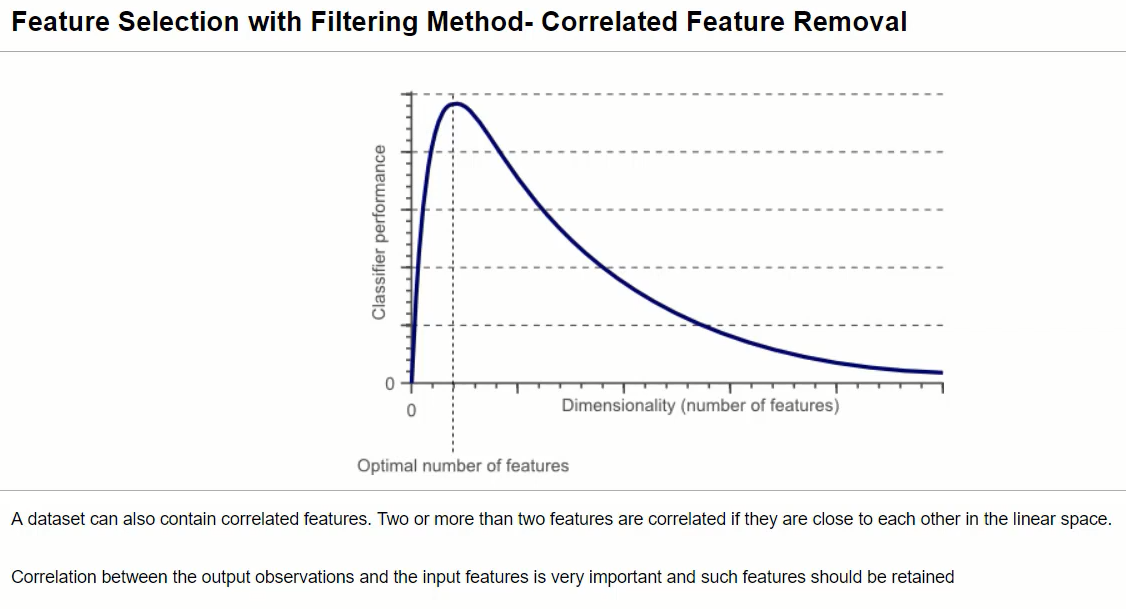

### Pearson Correlation Coefficient
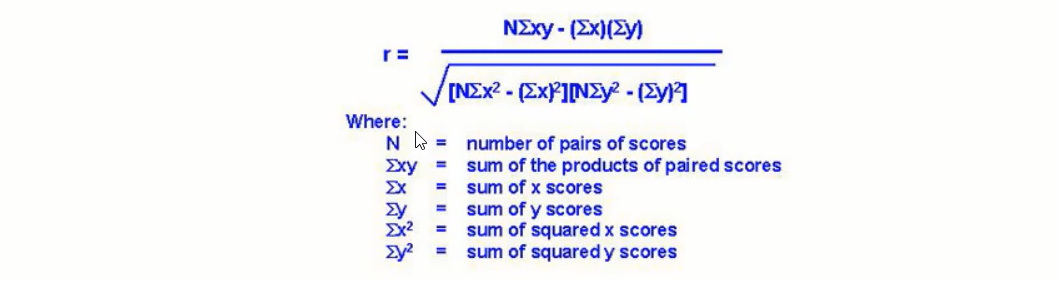

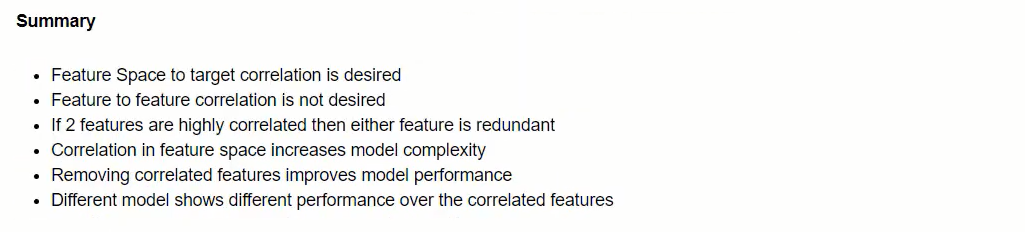

In [135]:
corrmat = X_test_unique.corr()

<AxesSubplot:>

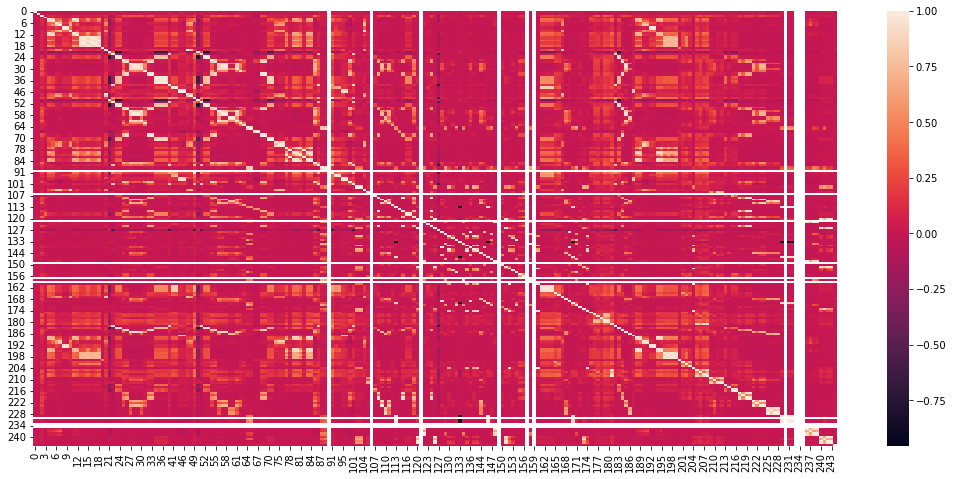

In [136]:
plt.figure(figsize=(18,8))
sns.heatmap(corrmat)

In [137]:
# define threshlod after which the features are removed
def get_correlation(data, threshold):
    corr_col = set() # taken set so features not get repeated
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])>threshold:
                column_name = corrmat.columns[i]
                corr_col.add(column_name)
    return corr_col

In [138]:
corr_features = get_correlation(X_train_unique, 0.85)
len(corr_features) # Features correlated 

124

In [139]:
X_train_uncorr = X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr = X_test_unique.drop(labels=corr_features, axis=1)

In [140]:
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 103), (4000, 103))

In [141]:
# Call random forest on cleaned selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_uncorr, X_test_uncorr, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")


Accuracy on test set
0.95875
Time: 2.5641369819641113


In [142]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 3.5372889041900635


### As per observation accurancy have not improved but time taken to execute has improved

## Feature grouping and feature importance

In [152]:
# correlation matrix data
corrmat

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,1.000000,-0.017314,-0.003673,0.011029,-0.003983,0.002704,-0.010186,-0.009394,-0.001856,-0.000761,...,NaN,-0.027275,-0.025398,-0.022073,-0.024668,0.031217,0.026699,0.030751,0.032278,-0.031391
1,-0.017314,1.000000,-0.020420,0.000465,-0.020137,-0.010355,0.002946,0.003287,0.000887,0.000801,...,NaN,0.001004,0.001043,0.001223,0.001248,0.000974,0.001235,0.000942,0.001028,-0.000063
2,-0.003673,-0.020420,1.000000,0.055941,0.111520,0.118722,0.085096,0.097923,0.010466,0.006604,...,NaN,0.029204,0.025458,0.035002,0.035034,0.040032,0.038910,0.039354,0.041769,-0.001424
3,0.011029,0.000465,0.055941,1.000000,0.040800,0.027317,0.000474,-0.001849,0.016486,0.016905,...,NaN,-0.001121,-0.001137,-0.001190,-0.001139,-0.001100,-0.001336,-0.001064,-0.001161,-0.002703
4,-0.003983,-0.020137,0.111520,0.040800,1.000000,0.831933,0.341873,0.321516,0.134575,0.133141,...,NaN,0.037561,0.120808,0.038229,0.050400,-0.002500,0.008492,-0.003096,-0.003184,-0.006233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.031217,0.000974,0.040032,-0.001100,-0.002500,-0.002552,-0.001249,-0.001373,-0.000383,-0.000346,...,NaN,-0.000428,-0.000434,-0.000522,-0.000532,1.000000,0.670916,0.999613,0.996146,-0.002004
241,0.026699,0.001235,0.038910,-0.001336,0.008492,0.006465,-0.001516,-0.001667,-0.000465,-0.000420,...,NaN,-0.000519,-0.000527,-0.000634,-0.000645,0.670916,1.000000,0.665762,0.654285,0.002489
242,0.030751,0.000942,0.039354,-0.001064,-0.003096,-0.003030,-0.001208,-0.001328,-0.000370,-0.000334,...,NaN,-0.000414,-0.000420,-0.000505,-0.000514,0.999613,0.665762,1.000000,0.994473,-0.001779
243,0.032278,0.001028,0.041769,-0.001161,-0.003184,-0.003146,-0.001318,-0.001450,-0.000404,-0.000365,...,NaN,-0.000451,-0.000458,-0.000551,-0.000561,0.996146,0.654285,0.994473,1.000000,-0.002725


In [153]:
# Vertical stacking of data as per rows
corrdata = corrmat.abs().stack()

In [154]:
# Sort corrdata in descending order
corrdata = corrdata.sort_values(ascending=False)
corrdata

128  136    1.000000
136  128    1.000000
158  134    1.000000
134  158    1.000000
130  138    1.000000
              ...   
184  120    0.000005
196  19     0.000003
19   196    0.000003
229  125    0.000002
125  229    0.000002
Length: 47089, dtype: float64

In [155]:
# We are getting correlation between same data corr!=1 or corr < 1 -> remove fatures
corrdata = corrdata[corrdata>0.05]
corrdata = corrdata[corrdata<1]
corrdata

20   47     1.000000
47   20     1.000000
24   53     1.000000
53   24     1.000000
52   23     1.000000
              ...   
28   135    0.050055
143  28     0.050055
28   143    0.050055
179  170    0.050041
170  179    0.050041
Length: 15384, dtype: float64

In [156]:
# Reset the data
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value'] # Create new columns
corrdata

,features1,features2,corr_value
0,20,47,1.000000
1,47,20,1.000000
2,24,53,1.000000
3,53,24,1.000000
4,52,23,1.000000
...,...,...,...
15379,28,135,0.050055
15380,143,28,0.050055
15381,28,143,0.050055
15382,179,170,0.050041


In [157]:
# Grouping of correlated features
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list:
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block)

In [158]:
len(correlated_groups_list)

17

In [160]:
X_train_uncorr.shape, X_train.shape

((16000, 103), (16000, 370))

In [161]:
for group in correlated_groups_list:
    print(group)

       features1  features2  corr_value
0             20         47    1.000000
697           20        167    0.775582
799           20         48    0.743479
1624          20        104    0.535883
1668          20         10    0.525638
...          ...        ...         ...
14246         20         28    0.058598
14376         20         57    0.057341
15255         20        185    0.050812
15317         20        209    0.050390
15327         20        187    0.050357

[115 rows x 3 columns]
       features1  features2  corr_value
6            154        132    1.000000
643          154        171    0.801741
1436         154         64    0.588290
1679         154        147    0.523437
2354         154        170    0.408027
2937         154         87    0.346102
4815         154         65    0.242114
7280         154        207    0.164927
7736         154         88    0.153695
8305         154        181    0.139998
8310         154        208    0.139937
8637         154

In [166]:
## Feature importance based on tree based classifier -> only get the unique performing features
important_features = []
for group in correlated_groups_list:
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train_unique[features], y_train)
    
    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis=1)
    importance.columns = ['features', 'importance'] # Add two columns in importance DataFrame
    importance.sort_values(by = 'importance', ascending=False, inplace=True) # Sort importance column in desc order
    feat = importance.iloc[0] # get the first most important feature
    important_features.append(feat)


In [168]:
important_features

[features      2.000000
 importance    0.282846
 Name: 59, dtype: float64,
 features      207.000000
 importance      0.233109
 Name: 8, dtype: float64,
 features      189.000000
 importance      0.638238
 Name: 22, dtype: float64,
 features      212.000000
 importance      0.203592
 Name: 31, dtype: float64,
 features      2.000000
 importance    0.273668
 Name: 21, dtype: float64,
 features      2.000000
 importance    0.355464
 Name: 18, dtype: float64,
 features      176.000000
 importance      0.196554
 Name: 24, dtype: float64,
 features      208.000000
 importance      0.197825
 Name: 14, dtype: float64,
 features      2.000000
 importance    0.316891
 Name: 25, dtype: float64,
 features      119.000000
 importance      0.119639
 Name: 64, dtype: float64,
 features      2.000000
 importance    0.356666
 Name: 34, dtype: float64,
 features      119.000000
 importance      0.260266
 Name: 26, dtype: float64,
 features      19.000000
 importance     0.722341
 Name: 0, dtype: float6

In [169]:
# Convert nparray -> dataframe
important_features = pd.DataFrame(important_features)

In [170]:
important_features.reset_index(inplace=True, drop=True)

In [171]:
important_features

,features,importance
0,2.0,0.282846
1,207.0,0.233109
2,189.0,0.638238
3,212.0,0.203592
4,2.0,0.273668
5,2.0,0.355464
6,176.0,0.196554
7,208.0,0.197825
8,2.0,0.316891
9,119.0,0.119639


In [177]:
features_to_consider = set(important_features['features'])

In [178]:
features_to_discard = set(corr_features) - set(features_to_consider)

In [179]:
features_to_discard = list(features_to_discard)

In [180]:
X_train_grouped_uncorr = X_train_unique.drop(labels = features_to_discard, axis=1)
X_test_grouped_uncorr = X_test_unique.drop(labels = features_to_discard, axis=1)
X_train_grouped_uncorr.shape, X_test_grouped_uncorr.shape

((16000, 106), (4000, 106))

In [181]:
# Call random forest on cleaned grouped selected features dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train_grouped_uncorr, X_test_grouped_uncorr, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.95725
Time: 2.8226473331451416


In [182]:
# Call random forest on origional dataset

import time  
# store starting time
begin = time.time()
  
run_random_forest(X_train, X_test, y_train, y_test)

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Time: {end - begin}")

Accuracy on test set
0.9585
Time: 3.917412042617798
